In [21]:
import pickle
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


import importlib
imported_module = importlib.import_module("MLP")
importlib.reload(imported_module)
from MLP import MultiLayerPerceptron

from utils import *


In [22]:
path = "./mlp.pkl"
mlp = pickle.load(open(path, "rb"))

In [23]:
df = get_data("../data/data.csv", headers=["id", "diagnosis"])
X, Y = get_X_Y(df, labels=["diagnosis"], drops=['id'])
Y = labelize_Y(Y, y_label="diagnosis", value="M")
raw = X.copy()
print(df.describe())
print(X.head(2))
print(Y.head(2))
print(X.head(5))

                 id          F0          F1          F2           F3  \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

               F4          F5          F6          F7          F8  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.000000    0.000000  

In [24]:
stds = mlp.normalization['stds']
means = mlp.normalization['means']
X = zscore(X, stds, means)

In [26]:
from sklearn.metrics import r2_score, accuracy_score

Y_pred = mlp.predict(X.to_numpy())
Y_pred_raw = mlp.predict(X.to_numpy(), raw=True)
print(accuracy_score(Y, Y_pred))

0.5483304042179262


/mnt/nfs/homes/jdurand/work/multilayer-perceptron/notebooks/MLP.py:13: RuntimeWarning: overflow encountered in exp
  r = 1 / (1 + np.exp(-x))


Text(0, 0.5, 'Loss')

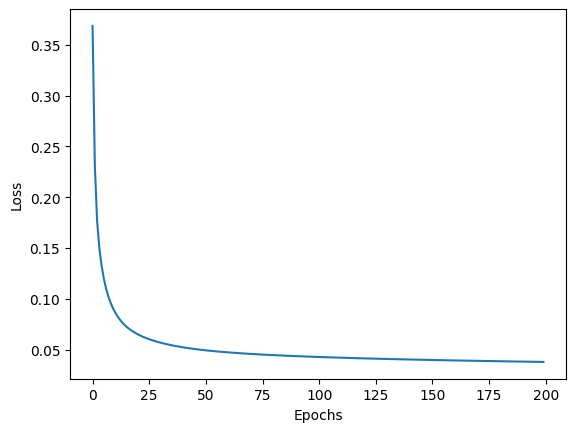

In [27]:
# plot losses

plt.clf()
plt.plot(np.arange(0, mlp.epochs), mlp.metrics['losses'])
plt.xlabel('Epochs')
plt.ylabel('Loss')


Text(0, 0.5, 'Score')

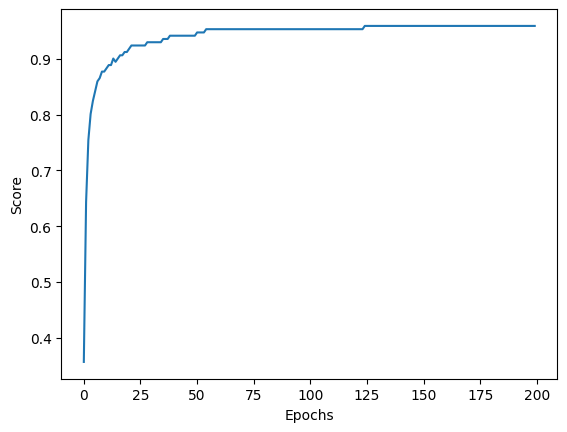

In [28]:
plt.clf()
plt.plot(np.arange(0, mlp.epochs), mlp.metrics['scores'])
plt.xlabel('Epochs')
plt.ylabel('Score')

Text(0, 0.5, 'binary cross entropy')

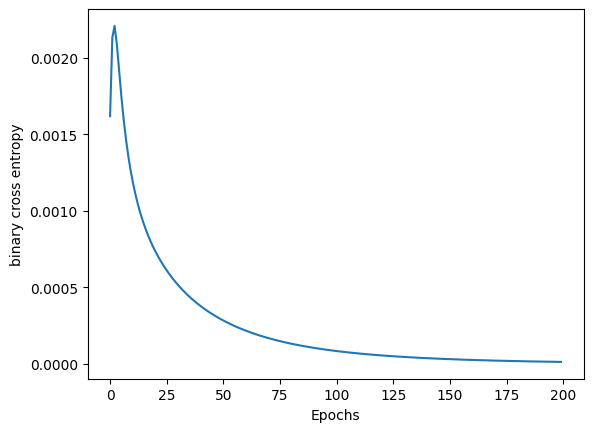

In [29]:
plt.clf()
plt.plot(np.arange(0, mlp.epochs), mlp.metrics['binary_cross_entropy'])
plt.xlabel('Epochs')
plt.ylabel('binary cross entropy')

Text(0, 0.5, 'Y')

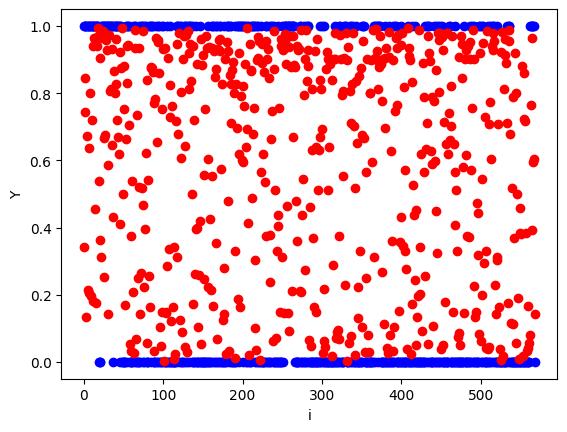

In [30]:
plt.clf()
plt.scatter(range(len(Y)), Y, color="blue")
plt.scatter(range(len(Y_pred_raw)), Y_pred_raw, color="red")
plt.xlabel('i')
plt.ylabel('Y')

In [31]:
# print(Y_pred_raw)

In [32]:
import seaborn as sn

<AxesSubplot:>

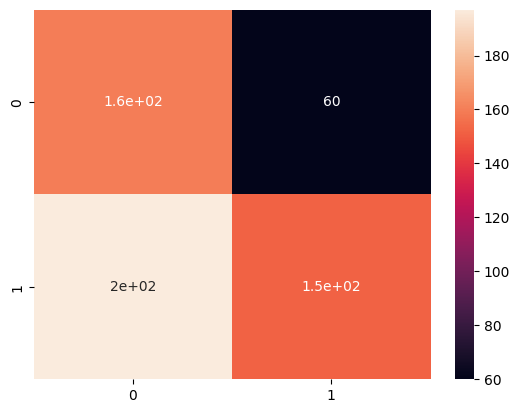

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y.to_numpy())

sn.heatmap(cm, annot=True)

<AxesSubplot:>

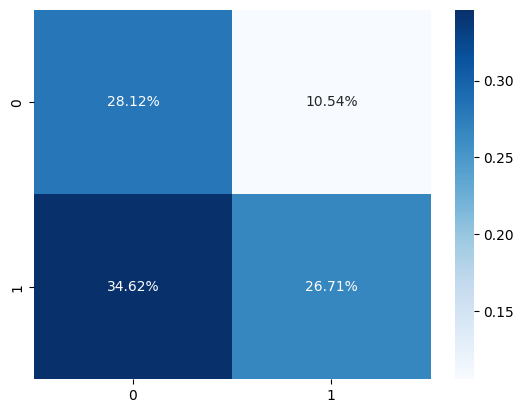

In [34]:
sn.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [35]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)



from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
# print(X.to_numpy())
# mlp.fit(X_train.to_numpy(), Y_train.to_numpy(), verbose=False, epochs=500, normalization={'stds': stds, 'means': means})

samples = np.arange(2, len(X_train), step=len(X_train) // 10)
# xs = []
val_scores = []
train_scores = []
for i in range(0, len(samples)):
    # mlp = MultiLayerPerceptron(seed=1)
    # mlp.add_layer(size=8)
    # mlp.add_layer(size=8)
    # mlp.add_layer(label="out`put_layer")
    # print(X_train.to_numpy()[:samples[i]].shape)
    mlp.fit(X_train.to_numpy()[:samples[i]], Y_train.to_numpy()[:samples[i]], epochs=100, normalization={'stds': stds, 'means': means})
    val_scores.append(accuracy_score(Y_test, mlp.predict(X_test.to_numpy())))
    train_scores.append(mlp.metrics['scores'][-1])
print(samples)
print(val_scores)
print(train_scores)


/mnt/nfs/homes/jdurand/work/multilayer-perceptron/notebooks/MLP.py:13: RuntimeWarning: overflow encountered in exp
  r = 1 / (1 + np.exp(-x))
/mnt/nfs/homes/jdurand/work/multilayer-perceptron/notebooks/MLP.py:13: RuntimeWarning: overflow encountered in exp
  r = 1 / (1 + np.exp(-x))
/mnt/nfs/homes/jdurand/work/multilayer-perceptron/notebooks/MLP.py:13: RuntimeWarning: overflow encountered in exp
  r = 1 / (1 + np.exp(-x))
/mnt/nfs/homes/jdurand/work/multilayer-perceptron/notebooks/MLP.py:13: RuntimeWarning: overflow encountered in exp
  r = 1 / (1 + np.exp(-x))
/mnt/nfs/homes/jdurand/work/multilayer-perceptron/notebooks/MLP.py:13: RuntimeWarning: overflow encountered in exp
  r = 1 / (1 + np.exp(-x))
/mnt/nfs/homes/jdurand/work/multilayer-perceptron/notebooks/MLP.py:13: RuntimeWarning: overflow encountered in exp
  r = 1 / (1 + np.exp(-x))
/mnt/nfs/homes/jdurand/work/multilayer-perceptron/notebooks/MLP.py:13: RuntimeWarning: overflow encountered in exp
  r = 1 / (1 + np.exp(-x))
/mnt/n

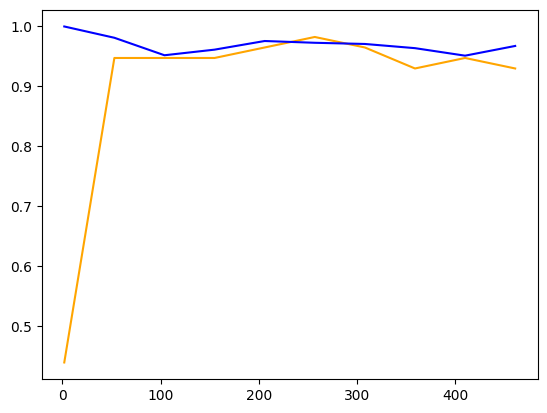

In [ ]:
plt.clf()
plt.plot(samples, val_scores, color="orange")
plt.plot(samples, train_scores, color="blue")

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=150)

# # samples = np.arange(2, len(X_train), step=len(X_train) // 10)
# # xs = []
# n_layers = np.arange(1, 3, step=1)
# n_nodes = 2
# nodes = [32, 32]
# val_scores = []
# # train_scores = []
# for i in range(0, len(n_layers)):
#     mlp2 = MultiLayerPerceptron(seed=1)
#     for j in range(0, n_layers[i]):
#         mlp2.add_layer(size=nodes[j])
#     mlp2.add_layer()
#     mlp2.fit(X_train.to_numpy(), Y_train.to_numpy(), epochs=100, normalization={'stds': stds, 'means': means})
#     print(i, mlp2.metrics['scores'][-1])
#     val_scores.append(accuracy_score(Y_test, mlp2.predict(X_test.to_numpy())))
#     # train_scores.append(mlp.metrics['scores'][-1])

0 0.966796875
1 0.96875


[0.9473684210526315, 0.9824561403508771]
[1 2]


TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

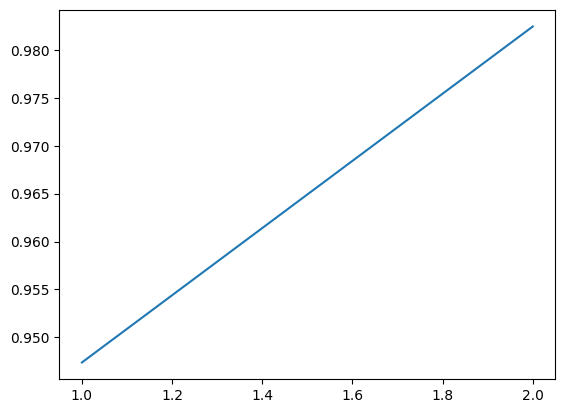

In [ ]:
# print(val_scores)
# print(n_layers)
# plt.clf()
# plt.plot(n_layers, val_scores)
# # for i in range(0, len(n_layers)):
    # plt.scatter()
# plt.plot(samples, val_scores, color="orange")
# plt.plot(samples, train_scores, color="blue")